In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# load diabetes dataset
diabetes = load_diabetes()
A = diabetes.data
# each row in A is a sample (442,10)
b = diabetes.target.reshape(-1,1)

A = np.hstack((np.ones((A.shape[0], 1)), A)) 
#  so in ax+b it can be b!=0
# so A is (442,11)

# initialize parameters
xk = np.zeros((A.shape[1],1))
# 11x1 vector
epsilon = 1e-3
delta = 0.01

# gradient descent algorithm
error_list = []

while 2 * np.linalg.norm(A.T @ A @ xk - A.T @ b)**2 > delta:
    error = (np.linalg.norm(A @ xk - b)**2)
    xk = xk - 2 * epsilon * A.T @ (A @ xk - b)
    error_list.append(error)




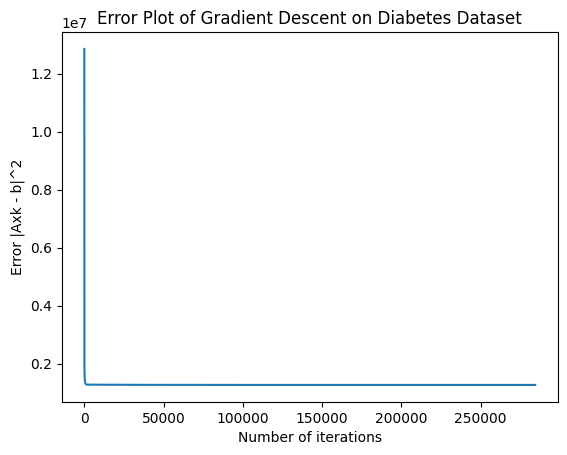

In [ ]:
# plot error graph
plt.plot(np.arange(len(error_list)), error_list)
plt.title('Error Plot of Gradient Descent on Diabetes Dataset')
plt.xlabel('Number of iterations')
plt.ylabel('Error |Axk - b|^2')
plt.show()

A = np.hstack((np.ones((A.shape[0], 1)), A)) 

בשביל שנוכל להסתכל על המשוואה בצורה מטריציאלית (ממ"ל)

למשל עבור ממ"ל דו מימדי 

ax+b

כשנרצה לכתוב בצורה מטריציאלית נכתוב

$$
\begin{pmatrix} a & b \end{pmatrix} 
\begin{pmatrix} x\\ 1 \end{pmatrix}
$$


ובעצם הוספנו את ה1 כדי שיהיה למשוואה פרמטר חופשי

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

def task_2(A,b,tr_frac,i) :
  te_frac = 1-tr_frac
  # split the data into train and test sets
  A_tr, A_te, b_tr, b_te = train_test_split(A, b, test_size=te_frac, random_state=i)

  # Add a column of ones to X_train and X_test for the bias term
  A_tr = np.hstack((np.ones((A_tr.shape[0], 1)), A_tr))
  A_te = np.hstack((np.ones((A_te.shape[0], 1)), A_te))

  # initialize parameters
  xk = np.zeros((A_tr.shape[1],1))
  epsilon = 1e-3
  delta = 0.01

  # gradient descent algorithm on train set
  error_list_tr = []
  error_list_te = []

  while 2 * np.linalg.norm(A_tr.T @ A_tr @ xk - A_tr.T @ b_tr)**2 > delta:
    xk = xk - 2 * epsilon * A_tr.T @ (A_tr @ xk - b_tr)
    error = (np.linalg.norm(A_tr @ xk - b_tr)**2)
    error_list_tr.append(error/(A.shape[0]*tr_frac))
    error_tst =(np.linalg.norm(A_te @ xk - b_te)**2)
    error_list_te.append(error_tst/(A.shape[0]*te_frac))

  return error_list_tr,error_list_te

tr_frac = 0.8
rnd_state = 42
tr,te = task_2(A,b,tr_frac,rnd_state)


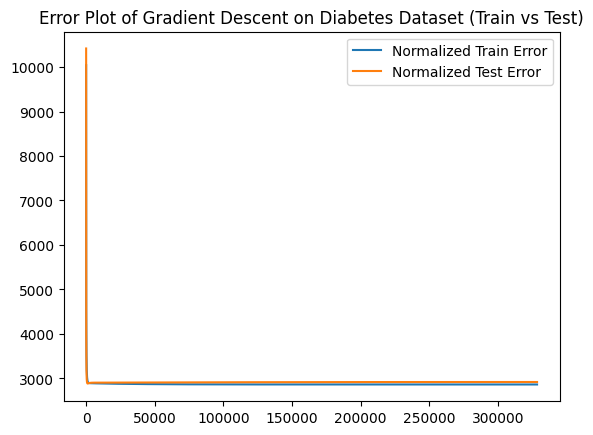

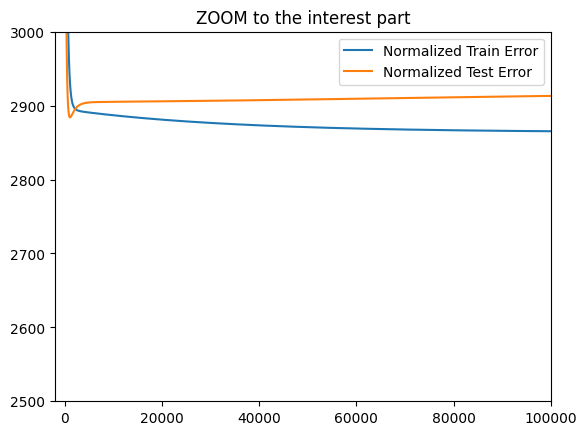

In [ ]:
plt.plot(tr, label='Normalized Train Error')
plt.plot(te, label='Normalized Test Error')
plt.title('Error Plot of Gradient Descent on Diabetes Dataset (Train vs Test)')
plt.legend()
plt.show()

plt.plot(tr, label='Normalized Train Error')
plt.plot(te, label='Normalized Test Error')
plt.title('ZOOM to the interest part')
plt.legend()
plt.ylim(2500,3000)
plt.xlim(-2000,100000)
plt.show()

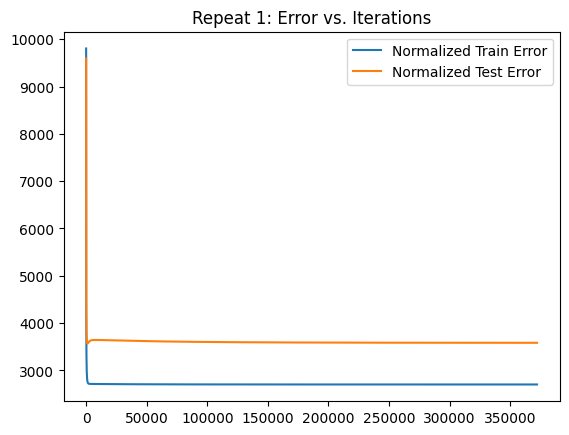

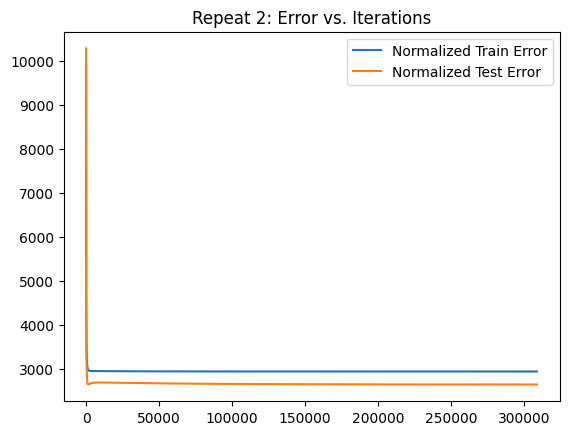

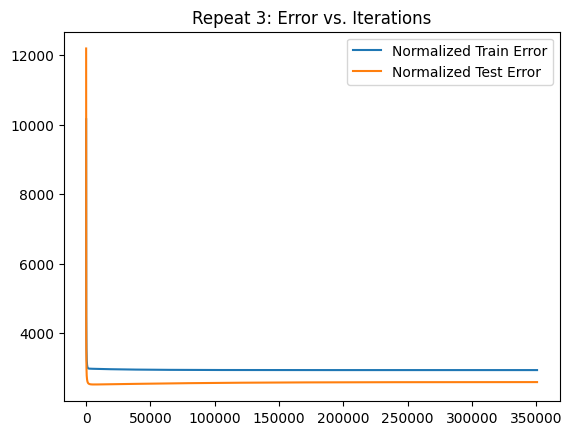

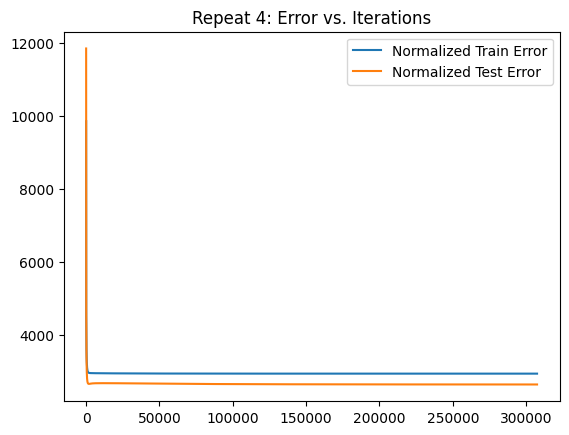

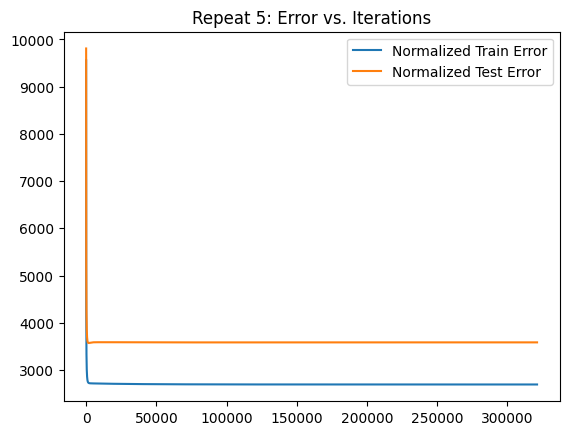

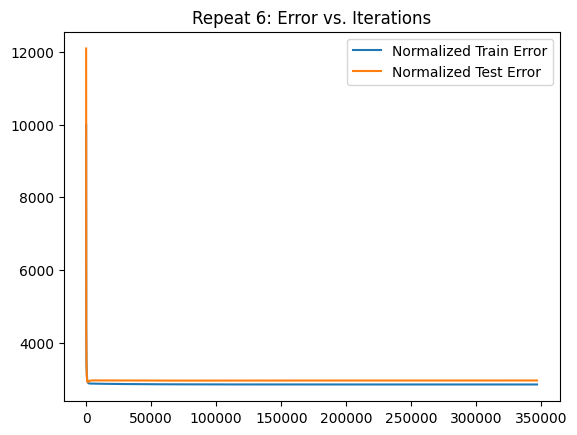

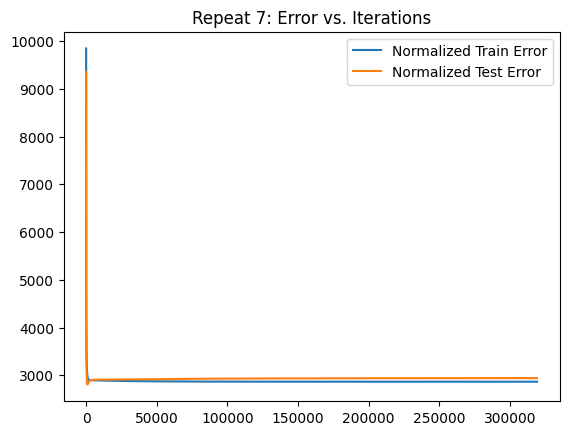

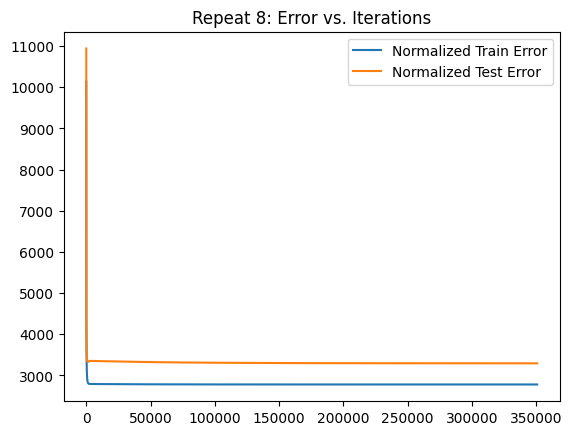

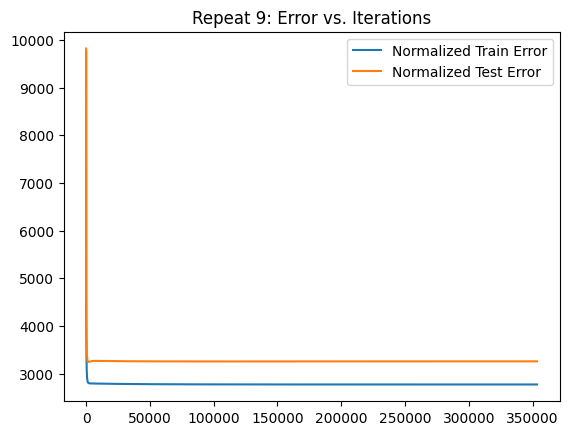

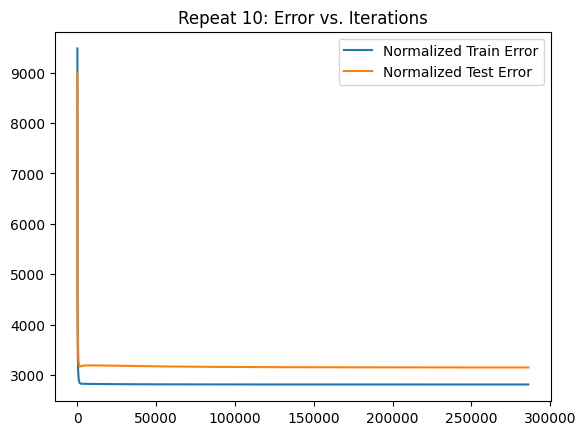

In [ ]:

all_error_list_tr = []
all_error_list_te = []


for i in range(10) :

  tr,te = task_2(A,b,0.8,None)
  
  all_error_list_tr.append(tr)
  all_error_list_te.append(te)

  plt.plot(tr, label='Normalized Train Error')
  plt.plot(te, label='Normalized Test Error')
  plt.title(f'Repeat {i+1}: Error vs. Iterations')
  plt.legend()
  plt.show()





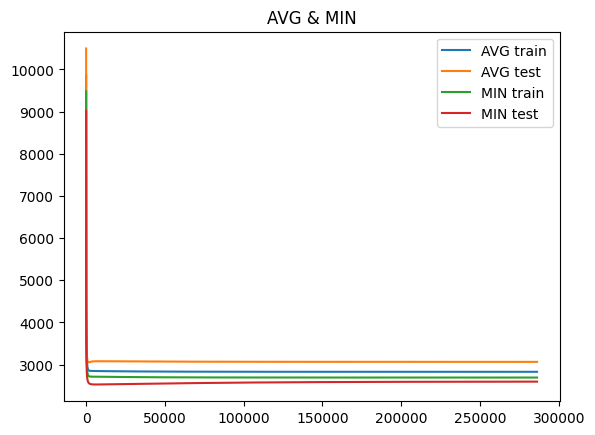

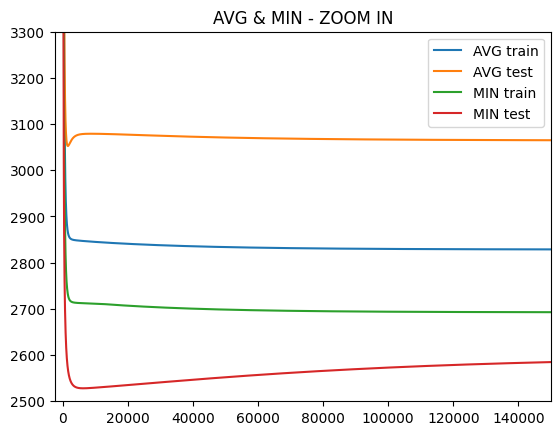

In [ ]:
min_num_of_iterations = min(len(l) for l in all_error_list_tr)

all_error_list_tr = [a[:min_num_of_iterations] for a in all_error_list_tr]
all_error_list_te = [a[:min_num_of_iterations] for a in all_error_list_te]

avg_tr = np.average(all_error_list_tr,axis=0)
avg_te = np.average(all_error_list_te,axis=0)
min_tr = np.amin(all_error_list_tr,axis=0)
min_te = np.amin(all_error_list_te,axis=0)

plt.plot(avg_tr, label='AVG train')
plt.plot(avg_te, label='AVG test')
plt.plot(min_tr, label='MIN train')
plt.plot(min_te, label='MIN test')
plt.title('AVG & MIN')
plt.legend()
plt.show()

plt.plot(avg_tr, label='AVG train')
plt.plot(avg_te, label='AVG test')
plt.plot(min_tr, label='MIN train')
plt.plot(min_te, label='MIN test')
plt.title('AVG & MIN - ZOOM IN')
plt.legend()
plt.ylim(2500,3300)
plt.xlim(-2500,150000)
plt.show()

